## Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121

DensNet

In [ ]:
EPOCHS = 50 ; BATCH_SIZE=64

input = tf.keras.layers.Input(shape=(64, 64, 3))
x = Conv2D(3, (3, 3), padding='same')(input)
x = DenseNet121(weights='imagenet', include_top=False)(x)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(2,activation = 'softmax', name='root')(x)
model = Model(input,output)
model.summary()
# Plotting model archittecture
tf.keras.utils.plot_model(model, "Artichecture.png", show_shapes=True)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0), metrics=['accuracy'])

# Fits the model on batches with real-time data augmentation
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="model.h5", save_weights_only=True, monitor='val_loss', mode='auto', save_best_only=True)
history = model.fit_generator(dataAug.flow(X_train, Y_train, batch_size=BATCH_SIZE), steps_per_epoch=X_train.shape[0] // BATCH_SIZE, epochs=EPOCHS, verbose=2, callbacks=[model_checkpoint_callback], validation_data=(X_val, Y_val))

model.evaluate(X_val, Y_val)
predictations =  model.predict(X_val)

Plot

In [ ]:
epochs = history.epoch
hist = pd.DataFrame(history.history)
train_mse = hist["loss"]
val_mse = hist["val_loss"]
plt.plot(epochs, train_mse)
plt.plot(epochs, val_mse)
plt.show()

epochs = history.epoch
hist = pd.DataFrame(history.history)
train_mse = hist["accuracy"]
val_mse = hist["val_accuracy"]
plt.plot(epochs, train_mse)
plt.plot(epochs, val_mse)
plt.show()

from sklearn.metrics import classification_report, accuracy_score
print('accuracy_score:', accuracy_score(np.argmax(Y_val, axis=1), np.argmax(predictations, axis=1)))
print(classification_report(np.argmax(Y_val, axis=1), np.argmax(predictations, axis=1), digits=4))

cm = confusion_matrix(np.argmax(Y_val, axis=1), np.argmax(predictations, axis=1))
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=20) ; ax.set_xlabel('Predicted', fontsize=20)

1/1 [==============================] - 0s 78ms/step
[0.99176425 0.0082357 ]


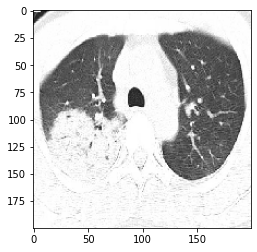

Prediction: Covid-19
َActual: COVID-19


In [ ]:
from skimage import io

img = tf.keras.utils.load_img('./dataset/COVID-19 Dataset/CT/COVID/2020.03.03.20030353-p17-106%1.png', grayscale=False, target_size=(64, 64))
show_img=tf.keras.utils.load_img('./dataset/COVID-19 Dataset/CT/COVID/2020.03.03.20030353-p17-106%1.png', grayscale=False, target_size=(200, 200))
disease_class=['Covid-19','Non Covid-19']
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

ind=np.argmax(custom[0])
        
print('Prediction:',disease_class[ind])
print('َActual: COVID-19')